In [178]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
# get all csv file paths from data folder
csv_files = glob.glob("data/CGMacros-*.csv")  

# columns we want to keep
selected_columns = ["Timestamp", "Libre GL", "Dexcom GL", "HR", "Calories", "Meal Type", "Carbs", "Protein", "Fat", "Fiber"]


# list storing data frames per participant
data_list = []

for file in csv_files:
    df = pd.read_csv(file)
    df["subject"] = int(file.split("-")[-1].split(".")[0]) 
    df = df[["subject"] + selected_columns]
    data_list.append(df)  

merged_df = pd.concat(data_list, ignore_index=True)

In [198]:
# keep this commented out because we already have the all_data.csv
# merged_df.to_csv("all_data.csv", index=False)

In [181]:
df = pd.read_csv('all_data.csv')

In [182]:
df

,subject,Timestamp,Libre GL,Dexcom GL,HR,Calories,Meal Type,Carbs,Protein,Fat,Fiber
0,1,2020-05-01 10:30:00,84.000000,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020-05-01 10:31:00,84.133333,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-05-01 10:32:00,84.266667,NaN,57.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-05-01 10:33:00,84.400000,NaN,54.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2020-05-01 10:34:00,84.533333,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
687575,49,2025-05-22 00:03:00,262.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687576,49,2025-05-22 00:04:00,261.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687577,49,2025-05-22 00:05:00,261.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687578,49,2025-05-22 00:06:00,260.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
bio_df = pd.read_csv('bio.csv')

In [184]:
# only keeping columns we want from bio.csv
bio_df = bio_df[["subject", "A1c PDL (Lab)"]].rename(columns={"A1c PDL (Lab)": "HbA1c"})

# merge df with bio_df
merged_data = df.merge(bio_df, on="subject", how="left")


# classify participants into Diabetes status groups
def classify_diabetes(hba1c):
    if hba1c < 5.7:
        return "No Diabetes"
    elif 5.7 <= hba1c <= 6.4:
        return "Pre-Diabetes"
    else:
        return "Type 2 Diabetes"


merged_data["Diabetes Status"] = merged_data["HbA1c"].apply(classify_diabetes)


def clean_meal_type(meal):
    if isinstance(meal, str):  
        meal = meal.lower()  
        if "snack" in meal:  
            return "Snack"
        elif "breakfast" in meal:
            return "Breakfast"
        elif "lunch" in meal:
            return "Lunch"
        elif "dinner" in meal:
            return "Dinner"
    return meal 

merged_data["Meal Type"] = merged_data["Meal Type"].apply(clean_meal_type)

merged_data["Timestamp"] = pd.to_datetime(merged_data["Timestamp"])


# split into separate dataframes
no_diabetes_df = merged_data[merged_data["Diabetes Status"] == "No Diabetes"]
pre_diabetes_df = merged_data[merged_data["Diabetes Status"] == "Pre-Diabetes"]
t2d_df = merged_data[merged_data["Diabetes Status"] == "Type 2 Diabetes"]



In [185]:
merged_data

,subject,Timestamp,Libre GL,Dexcom GL,HR,Calories,Meal Type,Carbs,Protein,Fat,Fiber,HbA1c,Diabetes Status
0,1,2020-05-01 10:30:00,84.000000,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,5.4,No Diabetes
1,1,2020-05-01 10:31:00,84.133333,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,5.4,No Diabetes
2,1,2020-05-01 10:32:00,84.266667,NaN,57.0,NaN,NaN,NaN,NaN,NaN,NaN,5.4,No Diabetes
3,1,2020-05-01 10:33:00,84.400000,NaN,54.0,NaN,NaN,NaN,NaN,NaN,NaN,5.4,No Diabetes
4,1,2020-05-01 10:34:00,84.533333,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,5.4,No Diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
687575,49,2025-05-22 00:03:00,262.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,Type 2 Diabetes
687576,49,2025-05-22 00:04:00,261.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,Type 2 Diabetes
687577,49,2025-05-22 00:05:00,261.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,Type 2 Diabetes
687578,49,2025-05-22 00:06:00,260.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,Type 2 Diabetes


In [166]:
# Checking if there is macro data (Carbs, Protein, Fat) when 'Meal Type' is missing
missing_meal_macros = merged_data[merged_data["Meal Type"].isna() & (merged_data[["Carbs", "Protein", "Fat"]].notna().any(axis=1))]

# Display rows
print(missing_meal_macros)


Empty DataFrame
Columns: [subject, Timestamp, Libre GL, Dexcom GL, HR, Calories, Meal Type, Carbs, Protein, Fat, Fiber, HbA1c, Diabetes Status]
Index: []


## NOTE FROM EUNICE: PROBABLY GROUP THE GRAPH BELOW BY DIABETE TYPE

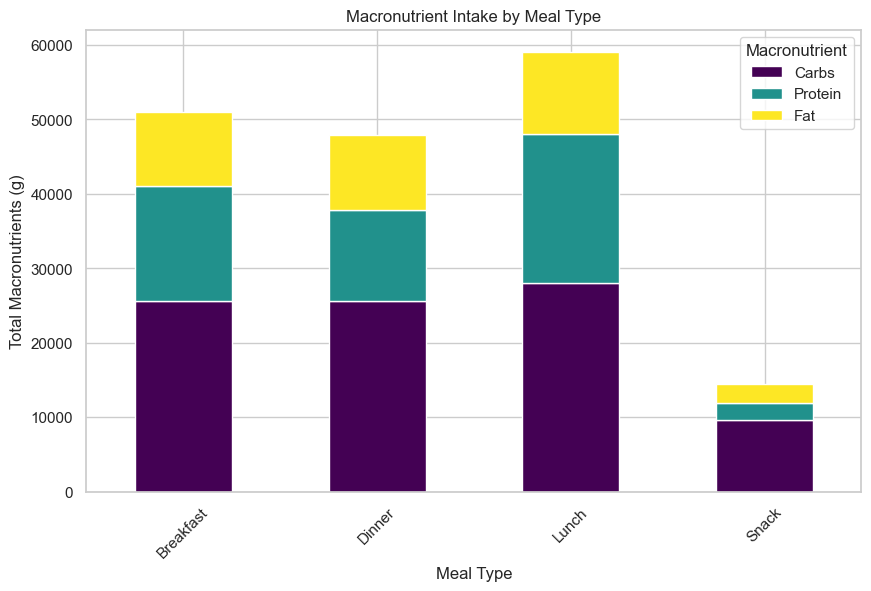

In [ ]:

# Remove rows where 'Meal Type' is missing
meal_df = merged_data.dropna(subset=['Meal Type'])

meal_macros = meal_df.groupby('Meal Type')[['Carbs', 'Protein', 'Fat']].sum()

meal_macros.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")
plt.xlabel("Meal Type")
plt.ylabel("Total Macronutrients (g)")
plt.title("Macronutrient Intake by Meal Type")
plt.legend(title="Macronutrient")
plt.xticks(rotation=45)
plt.show()

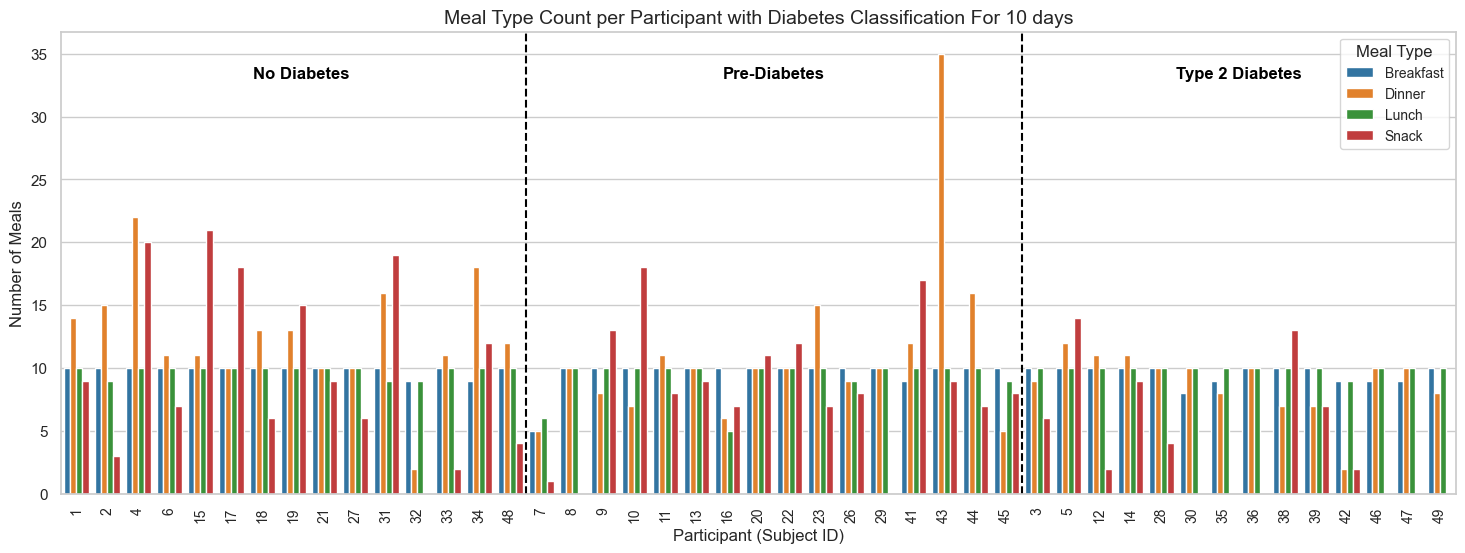

In [168]:
meal_diabetes_df = merged_data.copy()

meal_diabetes_df = meal_diabetes_df.sort_values(by=["Diabetes Status", "subject"])

meal_counts = meal_diabetes_df.groupby(["subject", "Meal Type"]).size().reset_index(name="Count")

subject_diabetes_status = meal_diabetes_df[["subject", "Diabetes Status"]].drop_duplicates()

meal_counts = meal_counts.merge(subject_diabetes_status, on="subject", how="left")

sorted_subjects = meal_counts.sort_values(by=["Diabetes Status", "subject"])["subject"].unique()
meal_counts["subject"] = pd.Categorical(meal_counts["subject"], categories=sorted_subjects, ordered=True)

sns.set(style="whitegrid")
plt.figure(figsize=(18, 6))

sns.barplot(data=meal_counts, x="subject", y="Count", hue="Meal Type", palette="tab10")

diabetes_groups = meal_counts.groupby("Diabetes Status")["subject"].unique()
boundaries = []
last_index = 0
for group in ["No Diabetes", "Pre-Diabetes", "Type 2 Diabetes"]:
    if group in diabetes_groups:
        last_index += len(diabetes_groups[group])
        boundaries.append(last_index - 0.5) 

for boundary in boundaries[:-1]: 
    plt.axvline(x=boundary, color="black", linestyle="--", linewidth=1.5)

midpoints = [0] + boundaries[:-1]  
labels = ["No Diabetes", "Pre-Diabetes", "Type 2 Diabetes"]
for i, label in enumerate(labels):
    if i < len(boundaries):
        x_pos = (midpoints[i] + boundaries[i]) / 2
        plt.text(x_pos, plt.ylim()[1] * 0.9, label, ha="center", fontsize=12, fontweight="bold", color="black")

plt.xticks(rotation=90, fontsize=10)
plt.xlabel("Participant (Subject ID)", fontsize=12)
plt.ylabel("Number of Meals", fontsize=12)
plt.title("Meal Type Count per Participant with Diabetes Classification For 10 days", fontsize=14)
plt.legend(title="Meal Type", fontsize=10)

plt.show()
